In [1]:
print("Raghu will be the best technical performer in the world")

Raghu will be the best technical performer in the world


In [2]:
#Import all the needed libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn import metrics
from tensorflow.keras.utils import to_categorical

C:\Users\RAGHU\AppData\Local\Temp\ipykernel_996\1141526189.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = "D:/Thesis/data_set/extracted_features.xlsx"
df = pd.read_excel(data, header=0, index_col=0)
df.head()

,Subject ID,Label,Maximum,Minimum,Mean,Standard Deviation,Variance,Root Mean Square,peak2peak,Mean of first Difference,...,Standard Deviation.2,Variance.2,Root Mean Square.2,peak2peak.2,Mean of first Difference.2,Mean Absolute Value of First Difference.2,Mean Absolute Value of Second Difference.2,Median.2,Median abs dev.2,Median Absolute Deviation from the Median.2
0,71309,BL1,13.061807,11.117231,11.891221,0.499261,0.249261,11.901697,1.944576,-0.000679,...,0.287120,0.082438,12.089905,0.907345,-3.223251e-04,0.000322,2.061020e-07,12.004807,0.214121,0.214121
1,71309,BL1,10.261610,9.837082,10.115794,0.107150,0.011481,10.116362,0.424528,-0.000111,...,0.003500,0.000012,10.146230,0.010385,-5.417378e-07,0.000007,1.715962e-08,10.145781,0.003084,0.003084
2,71309,BL1,10.066711,9.899511,9.995250,0.057279,0.003281,9.995414,0.167199,-0.000058,...,0.023230,0.000540,10.010966,0.069072,-2.453726e-05,0.000025,1.907065e-08,10.006847,0.020957,0.020957
3,71309,BL1,11.386347,10.673201,11.002208,0.224627,0.050457,11.004501,0.713146,-0.000253,...,0.112832,0.012731,11.070382,0.345739,-1.228204e-04,0.000123,8.421124e-08,11.041855,0.091206,0.091206
4,71309,BL1,10.729283,10.510500,10.613494,0.061370,0.003766,10.613671,0.218783,-0.000078,...,0.031915,0.001019,10.634505,0.098785,-3.509248e-05,0.000035,2.285345e-08,10.626368,0.025427,0.025427


In [4]:
# Use boolean indexing to set values based on condition
df.loc[df['Label'] == 'BL1', 'Label'] = 0
df.loc[df['Label'] == 'PA4', 'Label'] = 1

In [5]:
#get a list of all subjects
all_subjects = df['Subject ID'].unique()

In [6]:
#create an empty list to store accuracy and the cumulation matrix
accuracy_list = []
accuracy_list_mixup = []
sum_cm_no_mixup = None
sum_cm_mixup = None

In [7]:
y_true_list = []
y_pred_list = []
y_true_list_mixup = []
y_pred_list_mixup = []
accuracy_list = []
accuracy_list_mixup = []
roc_curve_list = []
roc_curve_list_mixup = []
fpr1_list = []
tpr1_list = []
fpr2_list = []
tpr2_list = []

sum_cm_no_mixup = None
sum_cm_mixup = None

In [8]:
def mixup(X, y, alpha=0.1):
    # Generate random indices for mixing samples
    
    lam = np.random.beta(alpha,alpha)
    #lam = alpha
    
    # Mix samples
    indices = np.random.permutation(len(X))

        
    X_mixed = lam * X + (1 - lam) * X[indices]
    
    # One-hot encode labels
    y_one_hot = to_categorical(y, num_classes=2)
    y_mixed = lam * y_one_hot + (1 - lam) * y_one_hot[indices]
    
    # Decode one-hot encoded labels
    y_mixed = np.argmax(y_mixed, axis=1)
    #print(y_mixed)
    
    return X_mixed, y_mixed


In [9]:
import numpy as np
from typing import Tuple

def mixup_nonlinear(X: np.ndarray, y: np.ndarray, alpha: float = 0.2) -> Tuple[np.ndarray, np.ndarray]:
    # Generate random indices for mixing samples
    indices = np.random.permutation(len(X))
    
    # Generate a non-linear mixing ratio using sine function
    lam = 0.5 * (1 - np.cos(alpha * np.pi))

    # Mix samples
    mixed_indices = np.random.permutation(len(X))
    X_mixed = lam * X + (1 - lam) * X[mixed_indices]
    
    # Mix labels (assuming one-hot encoding)
    num_classes = int(np.max(y) + 1)
    y_one_hot = np.eye(num_classes)[y.astype(int)]
    mixed_y_one_hot = lam * y_one_hot + (1 - lam) * y_one_hot[mixed_indices]
    y_mixed = np.argmax(mixed_y_one_hot, axis=1)
    
    return X_mixed, y_mixed


In [10]:
def mixup_three(X, y, alpha=0.1):
    # Generate random indices for mixing samples
    lam1 = np.random.beta(alpha, alpha)
    lam2 = np.random.beta(alpha, alpha)
    #lam = alpha
    
    # Mix samples
    indices1 = np.random.permutation(len(X))
    indices2 = np.random.permutation(len(X))
    
    X_mixed = lam1 * X + (1 - lam1) * X[indices1] + lam2 * X + (1 - lam2) * X[indices2]
    
    # One-hot encode labels
    y_one_hot = to_categorical(y, num_classes=3)
    y_mixed = lam1 * y_one_hot + (1 - lam1) * y_one_hot[indices1] + lam2 * y_one_hot + (1 - lam2) * y_one_hot[indices2]
    
    # Decode one-hot encoded labels
    y_mixed = np.argmax(y_mixed, axis=1)
    
    return X_mixed, y_mixed

In [11]:
#loop over all conditions and call the mixup function
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm

for idx, subject_ID in enumerate(all_subjects):
    
    #Split the data into training and test sets
    train_data = df[df['Subject ID'] != subject_ID]
    test_data = df[df['Subject ID'] == subject_ID]

    x_train = train_data.drop(['Subject ID', 'Label'], axis=1)
    x_test = test_data.drop(['Subject ID', 'Label'], axis=1)

    X_train = x_train.to_numpy().astype(np.float32)
    X_test = x_test.to_numpy().astype(np.float32)
    
    y_train = train_data['Label'].to_numpy().astype(np.float32)
    y_test = test_data['Label'].to_numpy().astype(np.float32)
    

    mixed_x, mixed_y = mixup(X_train, y_train, 0.1)

    X_combined = np.vstack((X_train,mixed_x))
    Y_combined = np.hstack((y_train, mixed_y))

    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    decision_scores = clf.decision_function(X_test)
    # Store true labels and predictions without mixup
    y_true_list.extend(y_test)
    y_pred_list.extend(decision_scores)

    clf1 = svm.SVC(kernel='linear') # Linear Kernel
    clf1.fit(X_combined, Y_combined)

    y_pred_mixup = clf1.predict(X_test)

    decision_scores_mixup = clf1.decision_function(X_test)
    # Store true labels and predictions with mixup
    y_true_list_mixup.extend(y_test)
    y_pred_list_mixup.extend(decision_scores_mixup)

    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

    acc_mixup = metrics.accuracy_score(y_test, y_pred_mixup)
    accuracy_list_mixup.append(acc_mixup)

    if acc_mixup > acc:
        print(f"Mixup better Accuracy {subject_ID} with mixup: {acc_mixup * 100:.2f}% and no mixup: {acc * 100:.2f}%")
    elif acc_mixup < acc:
        print(f"No mixup better Accuracy {subject_ID} with mixup: {acc_mixup * 100:.2f}% and no mixup: {acc*100:.2f}%")
    else:
        print(f"Both models equal {subject_ID} with mixup: {acc_mixup * 100:.2f}% and without mixup: {acc*100:.2f}%")
    
    
    cm_no_mixup = confusion_matrix(y_test,y_pred)
    if sum_cm_no_mixup is None:
        sum_cm_no_mixup = cm_no_mixup
    else:
        sum_cm_no_mixup += cm_no_mixup

    cm_mixup = confusion_matrix(y_test, y_pred_mixup)
    if sum_cm_mixup is None:
        sum_cm_mixup = cm_mixup
    else:
        sum_cm_mixup += cm_mixup
        
#get average of accuracies over all cross folds without mixup
mean_accuracy = np.mean(accuracy_list)
print(f"Average Accuracy without mixup: {mean_accuracy * 100:.5f}% ")

#get average of accuracies over all cross folds with mixup
mean_accuracy = np.mean(accuracy_list_mixup)
print(f"Average Accuracy with mixup: {mean_accuracy * 100: .5f}%")

Both models equal 71309 with mixup: 95.00% and without mixup: 95.00%
Both models equal 71313 with mixup: 97.50% and without mixup: 97.50%
Both models equal 71614 with mixup: 90.00% and without mixup: 90.00%
Mixup better Accuracy 71709 with mixup: 82.50% and no mixup: 80.00%
Both models equal 71814 with mixup: 67.50% and without mixup: 67.50%
Both models equal 71911 with mixup: 100.00% and without mixup: 100.00%
Both models equal 72414 with mixup: 92.50% and without mixup: 92.50%
Mixup better Accuracy 72514 with mixup: 85.00% and no mixup: 82.50%
Mixup better Accuracy 72609 with mixup: 100.00% and no mixup: 97.50%
Mixup better Accuracy 72714 with mixup: 87.50% and no mixup: 85.00%
No mixup better Accuracy 73109 with mixup: 87.50% and no mixup: 90.00%
No mixup better Accuracy 73114 with mixup: 95.00% and no mixup: 97.50%
Mixup better Accuracy 80209 with mixup: 75.00% and no mixup: 72.50%
Both models equal 80309 with mixup: 95.00% and without mixup: 95.00%
Both models equal 80314 with mix

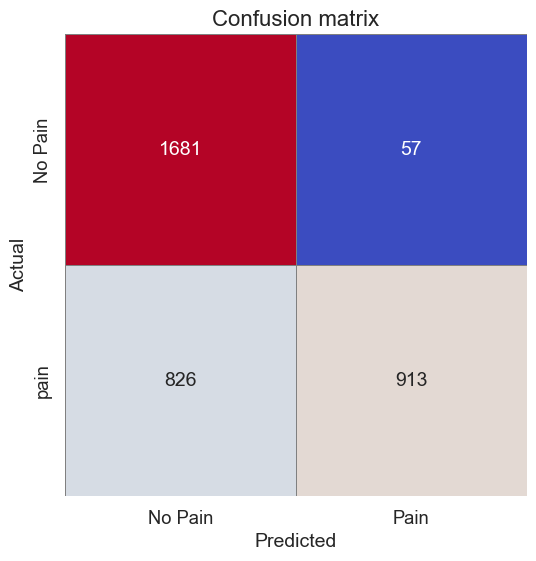

In [12]:
#Confusion matrix without mixup
#Plot the graph
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Pain', 'No Pain']

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(sum_cm_no_mixup,annot=True,fmt='d',cmap='coolwarm',cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='gray',
            square=True,xticklabels=['No Pain', 'Pain'],
            yticklabels=['No Pain', 'pain'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual',fontsize=14)
plt.title('Confusion matrix',fontsize=16)
plt.show()

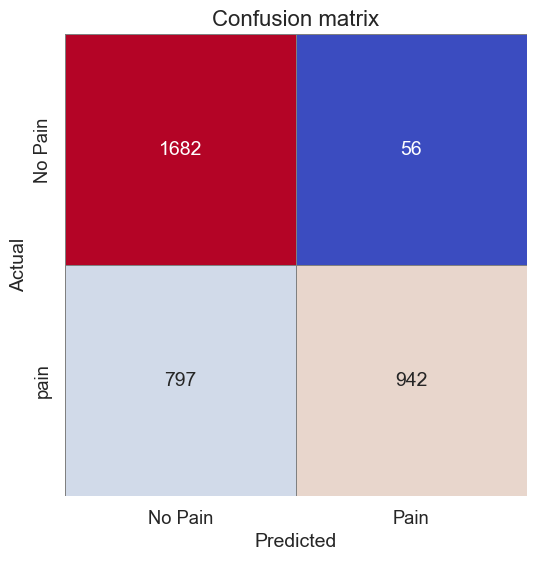

In [13]:
#Confusion matrix with mixup
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Pain', 'No Pain']

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(sum_cm_mixup,annot=True,fmt='d',cmap='coolwarm',cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='gray',
            square=True,xticklabels=['No Pain', 'Pain'],
            yticklabels=['No Pain', 'pain'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual',fontsize=14)
plt.title('Confusion matrix',fontsize=16)
plt.show()

In [14]:
# Calculate the Wilcoxon signed-rank test for your accuracy lists
from scipy.stats import wilcoxon
statistic, p_value = wilcoxon(accuracy_list, accuracy_list_mixup)
# Print test statistic and p-value
print("Wilcoxon Test Statistic:", statistic)
print("P-value:", p_value)


Wilcoxon Test Statistic: 105.5
P-value: 0.0013065899546540298


In [15]:
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. Model with mixup performed better")
else:
    print("Fail to reject the null hypothesis. Model without mixup performed better")

Reject the null hypothesis. Model with mixup performed better


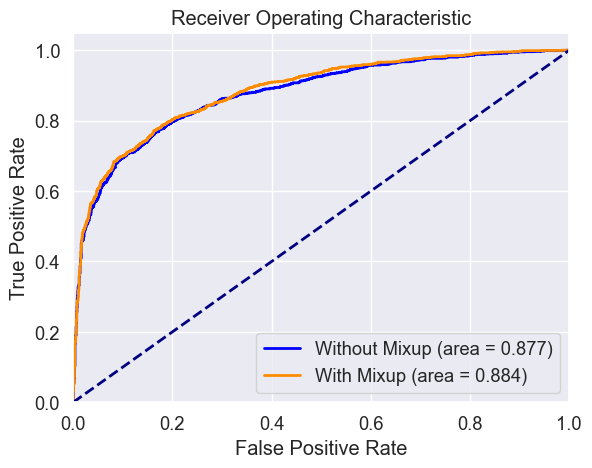

In [17]:
# Convert lists to numpy arrays for compatibility with sklearn functions
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)
y_true_mixup = np.array(y_true_list_mixup)
y_pred_mixup = np.array(y_pred_list_mixup)

# Compute ROC curve and AUC for without mixup
fpr1, tpr1, _ = roc_curve(y_true, y_pred)
roc_auc1 = roc_auc_score(y_true, y_pred)

# Compute ROC curve and AUC for with mixup
fpr2, tpr2, _ = roc_curve(y_true_mixup, y_pred_mixup)
roc_auc2 = roc_auc_score(y_true_mixup, y_pred_mixup)

# Plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Without Mixup (area = {:.3f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='With Mixup (area = {:.3f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()